In [33]:
import pandas as pd

df = pd.read_csv("../data/medical_data.csv")

df.head()

,Patient_ID,Age,Gender,Medical_Condition,Treatment,Outcome,Insurance_Type,Income,Region,Smoking_Status,Admission_Type,Hospital_ID,Length_of_Stay
0,1,77,Female,Chronic Obstructive,Dialysis,Stable,Public,77444,North,Former smoker,Urgent,3173,20
1,2,62,Female,Obesity,Physical therapy,Improved,Public,19367,West,Non-smoker,Urgent,65671,4
2,3,77,Male,Hypertension,Inhaler therapy,Improved,Medicare,16054,North,Non-smoker,Urgent,96914,3
3,4,41,Female,Alzheimer's Disease,Medication C,Worsened,Medicare,54371,West,Non-smoker,Emergency,15732,11
4,5,82,Male,Alzheimer's Disease,Chemotherapy,Stable,Private,55489,West,Non-smoker,Emergency,98232,2


Assumptions & Scope
This analysis assumes the dataset represents a post-extraction, pre-migration validation snapshot. The focus is on confirming data completeness, consistency, and analytical readiness rather than exploratory data cleaning.

In [34]:
df.shape

(1000, 13)

In [35]:
df.isnull().sum()

Patient_ID           0
Age                  0
Gender               0
Medical_Condition    0
Treatment            0
Outcome              0
Insurance_Type       0
Income               0
Region               0
Smoking_Status       0
Admission_Type       0
Hospital_ID          0
Length_of_Stay       0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df['Patient_ID'].nunique()

1000

In [38]:
df.describe(include='all')

,Patient_ID,Age,Gender,Medical_Condition,Treatment,Outcome,Insurance_Type,Income,Region,Smoking_Status,Admission_Type,Hospital_ID,Length_of_Stay
count,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,8,15,13,3,3,NaN,4,2,3,NaN,NaN
top,NaN,NaN,Male,Chronic Kidney Disease,Medication B,Improved,Private,NaN,South,Former smoker,Urgent,NaN,NaN
freq,NaN,NaN,462,81,93,363,340,NaN,263,500,350,NaN,NaN
mean,500.500000,45.710000,NaN,NaN,NaN,NaN,NaN,50181.756000,NaN,NaN,NaN,51709.297000,10.041000
std,288.819436,26.797612,NaN,NaN,NaN,NaN,NaN,29178.022872,NaN,NaN,NaN,29653.627294,6.066145
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,169.000000,NaN,NaN,NaN,37.000000,0.000000
25%,250.750000,22.750000,NaN,NaN,NaN,NaN,NaN,24079.750000,NaN,NaN,NaN,25293.000000,5.000000
50%,500.500000,45.000000,NaN,NaN,NaN,NaN,NaN,51972.500000,NaN,NaN,NaN,52220.500000,10.000000
75%,750.250000,70.000000,NaN,NaN,NaN,NaN,NaN,74972.500000,NaN,NaN,NaN,78788.000000,15.000000


In [39]:
df[df['Age'] < 0]
df[df['Age'] > 120]

df[df['Length_of_Stay'] < 0]

,Patient_ID,Age,Gender,Medical_Condition,Treatment,Outcome,Insurance_Type,Income,Region,Smoking_Status,Admission_Type,Hospital_ID,Length_of_Stay


In [40]:
df['Gender'].value_counts()
df['Outcome'].value_counts()
df['Admission_Type'].value_counts()

Admission_Type
Urgent       350
Emergency    345
Elective     305
Name: count, dtype: int64

**Business Rule Validation:**

In [41]:
df.groupby('Admission_Type')['Length_of_Stay'].mean()


Admission_Type
Elective      9.580328
Emergency    10.136232
Urgent       10.348571
Name: Length_of_Stay, dtype: float64


- Dataset contains 1,000 records and 13 fields
- No missing values or duplicate records detected
- Patient_ID uniquely identifies each record
- Value ranges and categorical fields appear consistent
- Dataset is suitable for downstream analytics and migration validation 

## Migration Risk Analytics 

In [42]:
# Length of Stay Outlier Detection
los_desc = df['Length_of_Stay'].describe()
los_desc


count    1000.000000
mean       10.041000
std         6.066145
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: Length_of_Stay, dtype: float64

In [43]:
iqr = los_desc['75%'] - los_desc['25%']
upper_bound = los_desc['75%'] + 1.5 * iqr

los_outliers = df[df['Length_of_Stay'] > upper_bound]
los_outliers.head()


,Patient_ID,Age,Gender,Medical_Condition,Treatment,Outcome,Insurance_Type,Income,Region,Smoking_Status,Admission_Type,Hospital_ID,Length_of_Stay


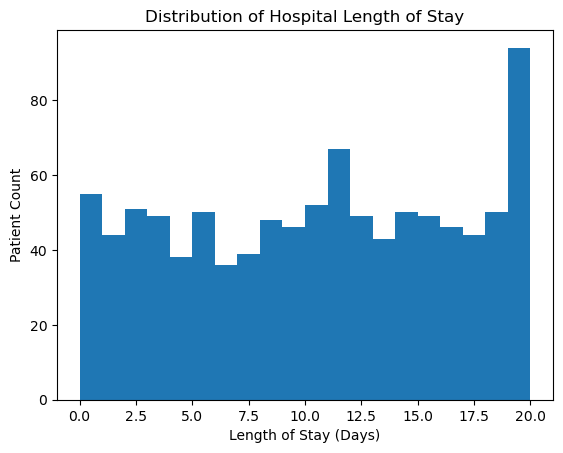

In [44]:
import matplotlib.pyplot as plt

plt.hist(df['Length_of_Stay'], bins=20)
plt.title('Distribution of Hospital Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Patient Count')
plt.show()


**Interpretation:**  
Extreme length-of-stay values were reviewed to identify potential data extraction or unit inconsistencies. Such anomalies could distort utilization reporting and reimbursement calculations following EHR migration.


In [45]:
# Outcome Distribution by Treatment
pd.crosstab(df['Treatment'], df['Outcome'], normalize='index')


Outcome,Improved,Stable,Worsened
Treatment,,,
Bone density tests,0.486111,0.208333,0.305556
Chemotherapy,0.310811,0.297297,0.391892
Dialysis,0.361111,0.347222,0.291667
Dietary changes,0.294118,0.397059,0.308824
Dietary counseling,0.337662,0.337662,0.324675
Immunosuppressants,0.325000,0.387500,0.287500
Inhaler therapy,0.426667,0.373333,0.200000
Medication A,0.380282,0.281690,0.338028
Medication B,0.397849,0.268817,0.333333


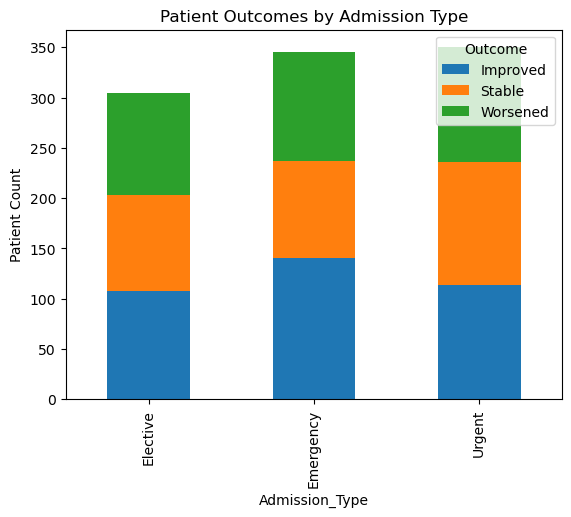

In [46]:
pd.crosstab(df['Admission_Type'], df['Outcome']).plot(kind='bar', stacked=True)
plt.title('Patient Outcomes by Admission Type')
plt.ylabel('Patient Count')
plt.show()


**Interpretation:**  
Outcome distributions were examined by treatment type to ensure no unexpected patterns emerged, supporting the clinical plausibility of migrated data.


In [47]:
# Admission Type vs Length of Stay
df.groupby('Admission_Type')['Length_of_Stay'].mean().sort_values()


Admission_Type
Elective      9.580328
Emergency    10.136232
Urgent       10.348571
Name: Length_of_Stay, dtype: float64


**Interpretation:**  
Urgent admissions show higher average length of stay, aligning with operational expectations and supporting overall data integrity.


## Final Summary & Conclusions


### Summary
This analysis performed data quality and analytical validation checks on a healthcare dataset representative of a post-extraction EHR migration scenario.

Key validations included:
- Confirmation of record counts, field completeness, and unique patient identifiers
- Review of numeric ranges and categorical values to identify potential migration anomalies
- Analytical validation of length-of-stay outliers, admission types, and outcome distributions to assess operational and clinical plausibility

### Conclusion
The dataset demonstrates strong completeness and internal consistency, with observed patterns aligning with expected healthcare workflows. No critical data quality issues were identified that would prevent downstream analytics or reporting.

These findings support the dataset’s readiness for migration and post-migration operational use.
